# Simulate Artificial Bee Colony (ABC) algorithm. Take sufficient test data; you may choose a problem of your choice to evaluate performance of ABC.

Iteration 1/200 — Best Value: 16.376750
Iteration 2/200 — Best Value: 4.611141
Iteration 3/200 — Best Value: 4.611141
Iteration 4/200 — Best Value: 0.506387
Iteration 5/200 — Best Value: 0.506387
Iteration 6/200 — Best Value: 0.506387
Iteration 7/200 — Best Value: 0.506387
Iteration 8/200 — Best Value: 0.506387
Iteration 9/200 — Best Value: 0.506387
Iteration 10/200 — Best Value: 0.506387
Iteration 11/200 — Best Value: 0.506387
Iteration 12/200 — Best Value: 0.506387
Iteration 13/200 — Best Value: 0.506387
Iteration 14/200 — Best Value: 0.506387
Iteration 15/200 — Best Value: 0.506387
Iteration 16/200 — Best Value: 0.494538
Iteration 17/200 — Best Value: 0.494538
Iteration 18/200 — Best Value: 0.494538
Iteration 19/200 — Best Value: 0.494538
Iteration 20/200 — Best Value: 0.346529
Iteration 21/200 — Best Value: 0.337744
Iteration 22/200 — Best Value: 0.337744
Iteration 23/200 — Best Value: 0.201025
Iteration 24/200 — Best Value: 0.201025
Iteration 25/200 — Best Value: 0.090721
Iteratio

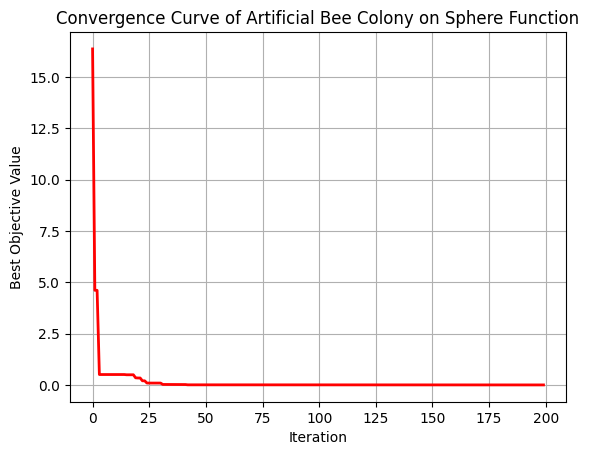

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Objective Function (Sphere Function)
def sphere(x):
    return np.sum(x ** 2)

# Artificial Bee Colony Algorithm
class ArtificialBeeColony:
    def __init__(self, func, n_dim=5, n_bees=30, limit=50, max_iter=200, lb=-5, ub=5):
        self.func = func
        self.n_dim = n_dim
        self.n_bees = n_bees
        self.limit = limit
        self.max_iter = max_iter
        self.lb = lb
        self.ub = ub

    def optimize(self):
        # Step 1: Initialize Food Sources
        food_sources = np.random.uniform(self.lb, self.ub, (self.n_bees, self.n_dim))
        fitness = np.array([self._fitness(self.func(x)) for x in food_sources])
        trial = np.zeros(self.n_bees)

        # Best solution tracking
        best_index = np.argmin([self.func(x) for x in food_sources])
        best_solution = food_sources[best_index].copy()
        best_value = self.func(best_solution)
        convergence_curve = []

        # Step 2: Iterations
        for it in range(self.max_iter):

            # Employed Bee Phase
            for i in range(self.n_bees):
                k = np.random.randint(0, self.n_bees)
                while k == i:
                    k = np.random.randint(0, self.n_bees)
                phi = np.random.uniform(-1, 1, self.n_dim)
                new_solution = food_sources[i] + phi * (food_sources[i] - food_sources[k])
                new_solution = np.clip(new_solution, self.lb, self.ub)
                new_value = self.func(new_solution)
                if self._fitness(new_value) > fitness[i]:
                    food_sources[i] = new_solution
                    fitness[i] = self._fitness(new_value)
                    trial[i] = 0
                else:
                    trial[i] += 1

            # Onlooker Bee Phase
            prob = fitness / np.sum(fitness)
            for i in range(self.n_bees):
                if np.random.rand() < prob[i]:
                    k = np.random.randint(0, self.n_bees)
                    while k == i:
                        k = np.random.randint(0, self.n_bees)
                    phi = np.random.uniform(-1, 1, self.n_dim)
                    new_solution = food_sources[i] + phi * (food_sources[i] - food_sources[k])
                    new_solution = np.clip(new_solution, self.lb, self.ub)
                    new_value = self.func(new_solution)
                    if self._fitness(new_value) > fitness[i]:
                        food_sources[i] = new_solution
                        fitness[i] = self._fitness(new_value)
                        trial[i] = 0
                    else:
                        trial[i] += 1

            # Scout Bee Phase
            for i in range(self.n_bees):
                if trial[i] > self.limit:
                    food_sources[i] = np.random.uniform(self.lb, self.ub, self.n_dim)
                    fitness[i] = self._fitness(self.func(food_sources[i]))
                    trial[i] = 0

            # Memorize best solution
            current_best_index = np.argmin([self.func(x) for x in food_sources])
            current_best_value = self.func(food_sources[current_best_index])
            if current_best_value < best_value:
                best_value = current_best_value
                best_solution = food_sources[current_best_index].copy()

            convergence_curve.append(best_value)
            print(f"Iteration {it+1}/{self.max_iter} — Best Value: {best_value:.6f}")

        return best_solution, best_value, convergence_curve

    def _fitness(self, value):
        if value >= 0:
            return 1 / (1 + value)
        else:
            return 1 + abs(value)

# ----------------------- Run Simulation ----------------------- #
if __name__ == "__main__":
    np.random.seed(42)
    abc = ArtificialBeeColony(func=sphere, n_dim=5, n_bees=40, limit=50, max_iter=200, lb=-5, ub=5)
    best_solution, best_value, curve = abc.optimize()

    print("\n===== Results =====")
    print("Best Solution:", best_solution)
    print("Best Objective Value:", best_value)

    # Plot Convergence Curve
    plt.plot(curve, 'r-', linewidth=2)
    plt.title("Convergence Curve of Artificial Bee Colony on Sphere Function")
    plt.xlabel("Iteration")
    plt.ylabel("Best Objective Value")
    plt.grid(True)
    plt.show()


Iteration 1: Best = 53.878962
Iteration 2: Best = 38.392868
Iteration 3: Best = 38.392868
Iteration 4: Best = 38.392868
Iteration 5: Best = 38.392868
Iteration 6: Best = 14.164581
Iteration 7: Best = 14.164581
Iteration 8: Best = 14.164581
Iteration 9: Best = 14.164581
Iteration 10: Best = 14.164581
Iteration 11: Best = 14.164581
Iteration 12: Best = 14.164581
Iteration 13: Best = 14.164581
Iteration 14: Best = 14.164581
Iteration 15: Best = 14.164581
Iteration 16: Best = 14.164581
Iteration 17: Best = 14.164581
Iteration 18: Best = 14.164581
Iteration 19: Best = 14.164581
Iteration 20: Best = 14.164581
Iteration 21: Best = 14.164581
Iteration 22: Best = 14.164581
Iteration 23: Best = 14.164581
Iteration 24: Best = 14.164581
Iteration 25: Best = 14.164581
Iteration 26: Best = 14.164581
Iteration 27: Best = 14.164581
Iteration 28: Best = 14.164581
Iteration 29: Best = 14.164581
Iteration 30: Best = 14.164581
Iteration 31: Best = 14.164581
Iteration 32: Best = 14.164581
Iteration 33: Bes

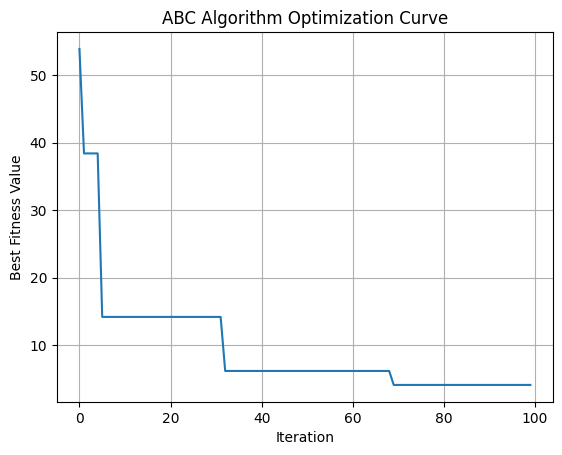

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# -------------------------------
# Rastrigin Function (Minimization)
# -------------------------------
def rastrigin(x):
    return 10 * len(x) + sum([(xi ** 2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])

# ----------------------------------
# Artificial Bee Colony Algorithm
# ----------------------------------
class ABC:
    def __init__(self, func, dim, lower_bound, upper_bound, num_bees=50, limit=100, max_iter=200):
        self.func = func
        self.dim = dim
        self.lower = lower_bound
        self.upper = upper_bound
        self.num_bees = num_bees
        self.limit = limit
        self.max_iter = max_iter
        self.food_sources = np.random.uniform(self.lower, self.upper, (num_bees, dim))
        self.fitness = np.array([self.calculate_fitness(fs) for fs in self.food_sources])
        self.trial = np.zeros(num_bees)
    
    def calculate_fitness(self, solution):
        value = self.func(solution)
        return 1 / (1 + value)  # Fitness inversely related to cost
    
    def employed_bee_phase(self):
        for i in range(self.num_bees):
            k = random.randint(0, self.num_bees - 1)
            while k == i:
                k = random.randint(0, self.num_bees - 1)
            phi = np.random.uniform(-1, 1, self.dim)
            new_solution = self.food_sources[i] + phi * (self.food_sources[i] - self.food_sources[k])
            new_solution = np.clip(new_solution, self.lower, self.upper)
            
            new_fit = self.calculate_fitness(new_solution)
            if new_fit > self.fitness[i]:
                self.food_sources[i] = new_solution
                self.fitness[i] = new_fit
                self.trial[i] = 0
            else:
                self.trial[i] += 1
    
    def onlooker_bee_phase(self):
        prob = self.fitness / np.sum(self.fitness)
        for i in range(self.num_bees):
            if random.random() < prob[i]:
                k = random.randint(0, self.num_bees - 1)
                while k == i:
                    k = random.randint(0, self.num_bees - 1)
                phi = np.random.uniform(-1, 1, self.dim)
                new_solution = self.food_sources[i] + phi * (self.food_sources[i] - self.food_sources[k])
                new_solution = np.clip(new_solution, self.lower, self.upper)
                
                new_fit = self.calculate_fitness(new_solution)
                if new_fit > self.fitness[i]:
                    self.food_sources[i] = new_solution
                    self.fitness[i] = new_fit
                    self.trial[i] = 0
                else:
                    self.trial[i] += 1
    
    def scout_bee_phase(self):
        for i in range(self.num_bees):
            if self.trial[i] > self.limit:
                self.food_sources[i] = np.random.uniform(self.lower, self.upper, self.dim)
                self.fitness[i] = self.calculate_fitness(self.food_sources[i])
                self.trial[i] = 0
    
    def optimize(self):
        best_values = []
        for iteration in range(self.max_iter):
            self.employed_bee_phase()
            self.onlooker_bee_phase()
            self.scout_bee_phase()
            
            best_index = np.argmax(self.fitness)
            best_value = self.func(self.food_sources[best_index])
            best_values.append(best_value)
            
            print(f"Iteration {iteration+1}: Best = {best_value:.6f}")
        
        best_solution = self.food_sources[np.argmax(self.fitness)]
        print("\nOptimal Solution:", best_solution)
        print("Optimal Value (Minimum):", self.func(best_solution))
        
        plt.plot(best_values)
        plt.title("ABC Algorithm Optimization Curve")
        plt.xlabel("Iteration")
        plt.ylabel("Best Fitness Value")
        plt.grid(True)
        plt.show()

# ----------------------------------
# Run the ABC Algorithm
# ----------------------------------
abc = ABC(func=rastrigin, dim=5, lower_bound=-5.12, upper_bound=5.12,
          num_bees=40, limit=50, max_iter=100)
abc.optimize()
